In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        

YAF_deep_ps.wav
YAF_base_ps.wav
YAF_jar_ps.wav
YAF_shout_ps.wav
YAF_cause_ps.wav
YAF_void_ps.wav
YAF_near_ps.wav
YAF_bite_ps.wav
YAF_merge_ps.wav
YAF_doll_ps.wav
YAF_note_ps.wav
YAF_good_ps.wav
YAF_wheat_ps.wav
YAF_fail_ps.wav
YAF_mode_ps.wav
YAF_keep_ps.wav
YAF_gas_ps.wav
YAF_pad_ps.wav
YAF_kick_ps.wav
YAF_name_ps.wav
YAF_bone_ps.wav
YAF_hole_ps.wav
YAF_shall_ps.wav
YAF_neat_ps.wav
YAF_door_ps.wav
YAF_gun_ps.wav
YAF_bath_ps.wav
YAF_size_ps.wav
YAF_keg_ps.wav
YAF_mill_ps.wav
YAF_hush_ps.wav
YAF_food_ps.wav
YAF_when_ps.wav
YAF_young_ps.wav
YAF_whip_ps.wav
YAF_love_ps.wav
YAF_puff_ps.wav
YAF_lean_ps.wav
YAF_soap_ps.wav
YAF_fall_ps.wav
YAF_lose_ps.wav
YAF_cool_ps.wav
YAF_rush_ps.wav
YAF_lot_ps.wav
YAF_which_ps.wav
YAF_pass_ps.wav
YAF_soup_ps.wav
YAF_peg_ps.wav
YAF_time_ps.wav
YAF_tape_ps.wav
YAF_page_ps.wav
YAF_knock_ps.wav
YAF_mouse_ps.wav
YAF_live_ps.wav
YAF_wire_ps.wav
YAF_jug_ps.wav
YAF_hall_ps.wav
YAF_rag_ps.wav
YAF_numb_ps.wav
YAF_phone_ps.wav
YAF_lease_ps.wav
YAF_fat_ps.wav
YAF_hom

CREATE DATA FRAME

In [4]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,archive/TESS Toronto emotional speech set data...,ps
1,archive/TESS Toronto emotional speech set data...,ps
2,archive/TESS Toronto emotional speech set data...,ps
3,archive/TESS Toronto emotional speech set data...,ps
4,archive/TESS Toronto emotional speech set data...,ps


In [5]:
df['label'].value_counts()

ps         800
fear       800
happy      800
angry      800
sad        800
disgust    800
neutral    800
Name: label, dtype: int64

In [6]:
labels = np.array(df['label'].value_counts().index)

In [7]:
def wavplot(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()
    
def spectrogram(data, sample_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

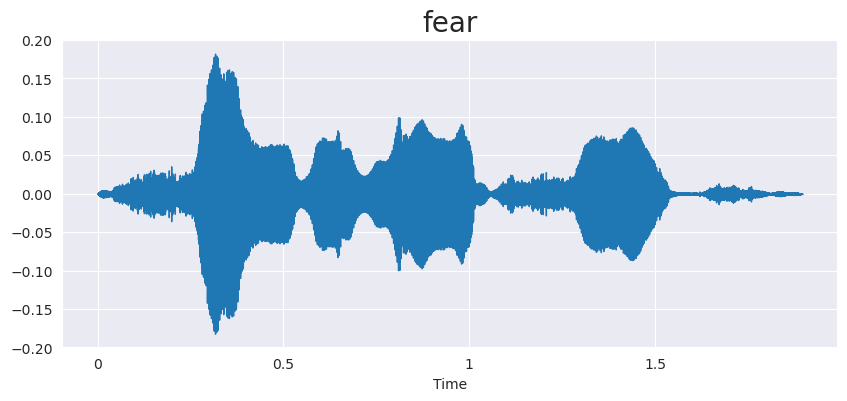

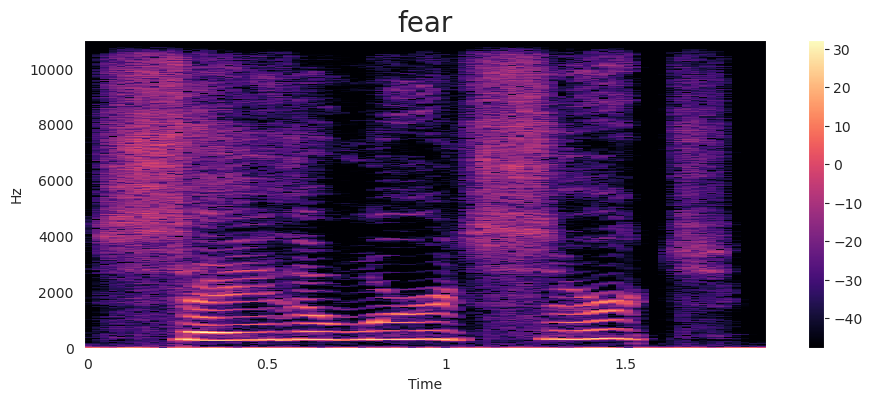

In [8]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
wavplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

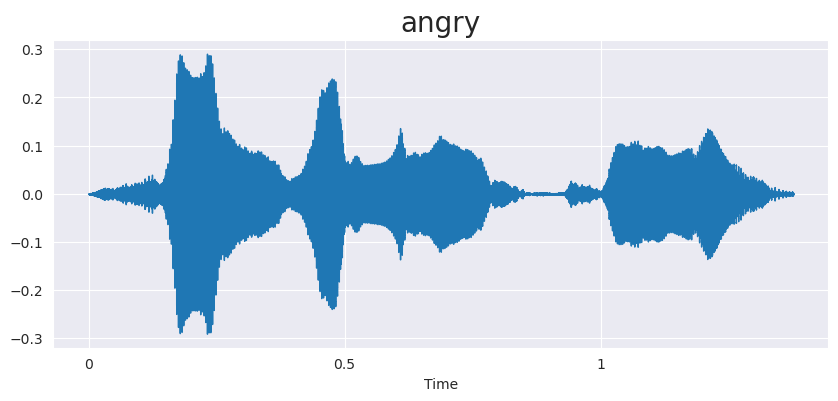

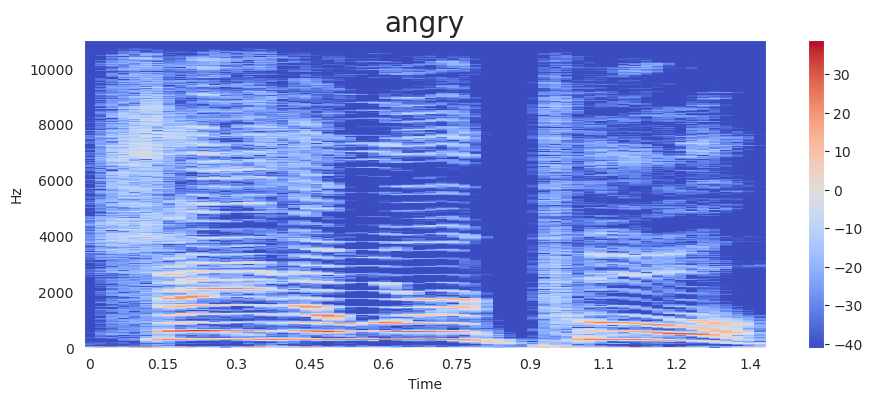

In [9]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
wavplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

FEATURE EXTRACTION

In [10]:
def extract_mfcc(filename):
    y, sample_rate = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sample_rate, n_mfcc=40).T, axis=0)
    return mfcc

In [11]:
extract_mfcc(df['speech'][0])

array([-4.2121509e+02,  5.3230766e+01,  2.1157432e+00,  3.0951002e+01,
       -1.1997291e+01, -1.9866381e+00, -1.9800373e+00, -2.2004612e+01,
       -9.0651035e+00, -8.0221510e+00, -1.4104131e+01,  6.8426746e-01,
       -8.7734156e+00,  6.2884436e+00,  1.0370710e+00,  3.7625775e-02,
        6.7301526e+00,  2.4184039e+00, -2.9938877e+00,  4.5352888e+00,
       -7.7261405e+00,  3.1624298e+00, -3.1938720e+00,  1.1712371e+00,
        3.7883121e-01, -1.6084507e+00,  4.8389440e+00,  8.7539091e+00,
        8.6596136e+00,  1.0973214e+01,  5.4350471e+00,  8.0257530e+00,
        5.2728901e+00,  6.6687994e+00,  4.2869968e+00,  8.3679371e+00,
        2.0079563e+00,  2.5168052e+00,  1.5357306e+00,  5.4915209e+00],
      dtype=float32)

In [12]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [13]:
X_mfcc

0       [-421.2151, 53.230766, 2.1157432, 30.951002, -...
1       [-365.30933, 49.432762, 3.9111893, 0.03842034,...
2       [-334.1335, 64.321014, -24.577152, -19.117796,...
3       [-317.82718, 41.663933, -7.87541, 6.557426, -2...
4       [-360.52997, 54.416157, -13.800962, -11.5581, ...
                              ...                        
5595    [-528.36365, 82.47117, 13.720245, 2.487353, 18...
5596    [-542.9124, 122.797585, 35.043484, 8.723092, -...
5597    [-512.2829, 95.287636, 18.962694, 10.175448, 1...
5598    [-505.1771, 79.739365, 22.15061, 9.000076, 9.9...
5599    [-504.15314, 96.467674, 14.370482, -3.5922487,...
Name: speech, Length: 5600, dtype: object

In [14]:
X = [X for X in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [15]:
# input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [16]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [17]:
y[0]
y = y.toarray()

In [18]:
y.shape

(5600, 7)

CREATE LSTM MODEL

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')    
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2023-08-14 10:14:13.224960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 10:14:14.233014: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

2023-08-14 10:14:14.504815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-14 10:14:14.506051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-14 10:14:14.506767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [20]:
# train model

history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100


2023-08-14 10:14:14.777675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-14 10:14:14.778777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-14 10:14:14.779526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - ETA: 0s - loss: 1.8590 - accuracy: 0.2408

2023-08-14 10:14:19.275136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-14 10:14:19.276320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-14 10:14:19.277258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 5s 417ms/step - loss: 1.8590 - accuracy: 0.2408 - val_loss: 1.8271 - val_accuracy: 0.0652
Epoch 2/100
9/9 [==============================] - 4s 409ms/step - loss: 1.6225 - accuracy: 0.3670 - val_loss: 1.5613 - val_accuracy: 0.3884
Epoch 3/100
9/9 [==============================] - 4s 436ms/step - loss: 1.2796 - accuracy: 0.4993 - val_loss: 1.1083 - val_accuracy: 0.6634
Epoch 4/100
9/9 [==============================] - 4s 452ms/step - loss: 1.0455 - accuracy: 0.5933 - val_loss: 0.8142 - val_accuracy: 0.7911
Epoch 5/100
9/9 [==============================] - 4s 467ms/step - loss: 0.8549 - accuracy: 0.6752 - val_loss: 0.6229 - val_accuracy: 0.8071
Epoch 6/100
9/9 [==============================] - 5s 576ms/step - loss: 0.6669 - accuracy: 0.7516 - val_loss: 0.4690 - val_accuracy: 0.8580
Epoch 7/100
9/9 [==============================] - 6s 671ms/step - loss: 0.5079 - accuracy: 0.8230 - val_loss: 0.3968 - val_accuracy: 0.8616
Epoch 8/100
9/9 [========

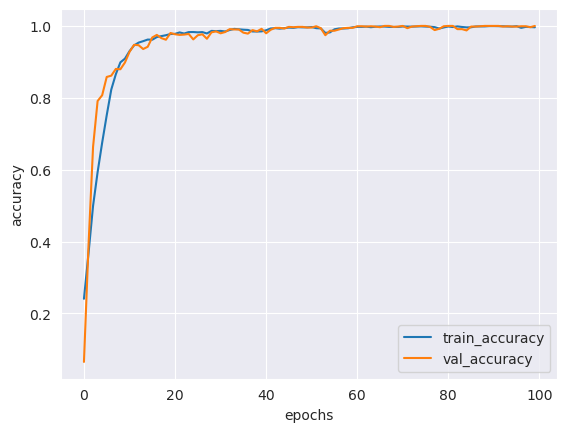

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = list(range(100))
plt.plot(epochs, acc, label='train_accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [22]:
plt.show()